In [1]:
import random

In [2]:
def calculate_completion_time(schedule, execution_times, m):
    processor_times = [0] * m 
    for task, processor in enumerate(schedule):
        processor_times[processor] += execution_times[task][processor]
    return max(processor_times)

In [3]:
from itertools import product

T = 4  # broj zadataka
m = 2  # broj procesora

execution_times = [
    [3, 2],
    [2, 1],
    [4, 3],
    [1, 2],  
]

In [21]:
def local_search(execution_times, m, max_iterations):    
    n = len(execution_times)
    schedule = [random.randint(0, m - 1) for _ in range(n)]
    current_makespan = calculate_completion_time(schedule, execution_times, m)
    
    for _ in range(max_iterations):
        new_schedule = schedule[:]
        task = random.randint(0, n - 1) 
        new_schedule[task] = random.randint(0, m - 1) 

        new_makespan = calculate_completion_time(new_schedule, execution_times, m)
        
        if new_makespan < current_makespan:
            schedule = new_schedule[:]
            current_makespan = new_makespan

    return schedule, current_makespan

max_iterations = 1000
best_schedule, best_makespan = local_search(execution_times, m, max_iterations)

print(f"Optimalni raspored sa lokalnom pretragom: {best_schedule}")
print(f"Minimalno vreme završetka: {best_makespan}")


Optimalni raspored sa lokalnom pretragom: [0, 1, 1, 0]
Minimalno vreme završetka: 4


Optimalni raspored sa lokalnom pretragom: [1, 1, 0, 1]
Minimalno vreme završetka: 5


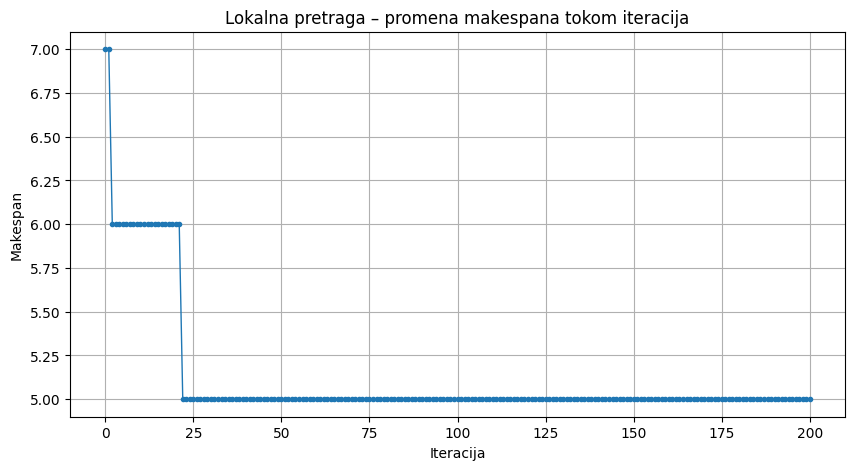

In [33]:
import matplotlib.pyplot as plt
import random

def local_search_with_history(execution_times, m, max_iterations):    
    n = len(execution_times)
    schedule = [random.randint(0, m - 1) for _ in range(n)]
    current_makespan = calculate_completion_time(schedule, execution_times, m)
    
    history = [current_makespan]  # pamti istoriju
    
    for _ in range(max_iterations):
        new_schedule = schedule[:]
        task = random.randint(0, n - 1) 
        new_schedule[task] = random.randint(0, m - 1) 

        new_makespan = calculate_completion_time(new_schedule, execution_times, m)
        
        if new_makespan < current_makespan:
            schedule = new_schedule[:]
            current_makespan = new_makespan

        history.append(current_makespan)

    return schedule, current_makespan, history


# Test primer
T = 4
m = 2
execution_times = [
    [3, 2],
    [2, 1],
    [4, 3],
    [1, 2],  
]

best_schedule, best_makespan, history = local_search_with_history(execution_times, m, 200)

print(f"Optimalni raspored sa lokalnom pretragom: {best_schedule}")
print(f"Minimalno vreme završetka: {best_makespan}")

# crtanje
plt.figure(figsize=(10, 5))
plt.plot(history, marker='o', markersize=3, linewidth=1)
plt.xlabel("Iteracija")
plt.ylabel("Makespan")
plt.title("Lokalna pretraga – promena makespana tokom iteracija")
plt.grid(True)
plt.show()


Optimalni raspored sa lokalnom pretragom: [0, 1, 1, 0]
Minimalno vreme završetka: 4


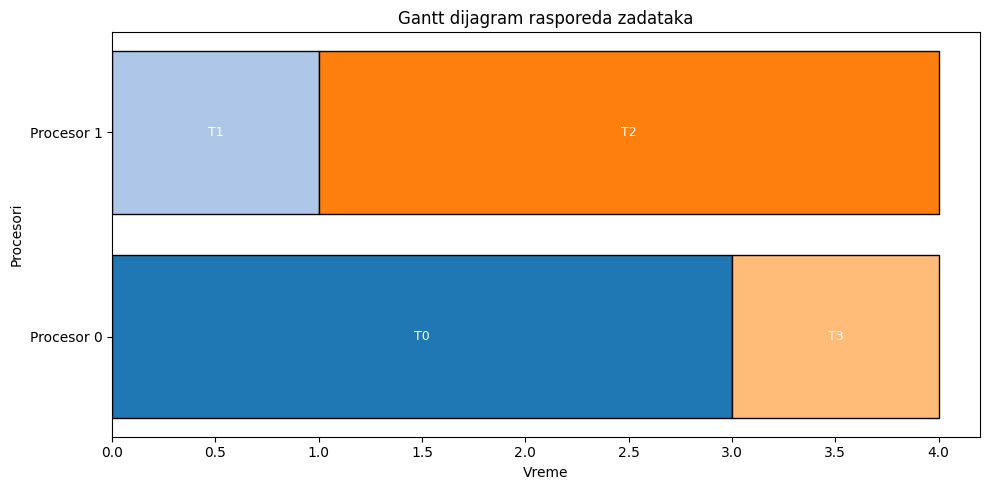

In [34]:
import matplotlib.pyplot as plt
import random

def plot_gantt(schedule, execution_times, m):
    fig, ax = plt.subplots(figsize=(10, 5))
    
    colors = plt.cm.tab20.colors  # paleta boja
    processor_times = [0] * m
    
    for task, processor in enumerate(schedule):
        start = processor_times[processor]
        duration = execution_times[task][processor]
        ax.barh(processor, duration, left=start, color=colors[task % len(colors)], edgecolor="black")
        ax.text(start + duration/2, processor, f"T{task}", ha="center", va="center", color="white", fontsize=9)
        processor_times[processor] += duration
    
    ax.set_yticks(range(m))
    ax.set_yticklabels([f"Procesor {i}" for i in range(m)])
    ax.set_xlabel("Vreme")
    ax.set_ylabel("Procesori")
    ax.set_title("Gantt dijagram rasporeda zadataka")
    plt.tight_layout()
    plt.show()


# Test primer sa lokalnom pretragom
T = 4
m = 2
execution_times = [
    [3, 2],
    [2, 1],
    [4, 3],
    [1, 2],  
]

best_schedule, best_makespan, history = local_search_with_history(execution_times, m, 200)

print(f"Optimalni raspored sa lokalnom pretragom: {best_schedule}")
print(f"Minimalno vreme završetka: {best_makespan}")

# crtamo Gantt dijagram
plot_gantt(best_schedule, execution_times, m)
